<a href="https://colab.research.google.com/github/bilawalkhan55/Artificial-intelligence/blob/main/LabAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Create a dictionary to store student information
student = {
    "name": "Ali",
    "age": 20,
    "roll_number": "BSCS-101",
    "grade": "B"
}

# Step 2: Print all keys and values
print("Initial Student Information:")
for key, value in student.items():
    print(f"{key}: {value}")

# Step 3: Update the grade of the student
student["grade"] = "A"
print("\nAfter Updating Grade:")
print(student)

# Step 4: Add a new key 'email' with a value
student["email"] = "ali@example.com"
print("\nAfter Adding Email:")
print(student)

# Step 5: Delete the 'roll_number' key
del student["roll_number"]
print("\nAfter Deleting roll_number:")
print(student)

Initial Student Information:
name: Ali
age: 20
roll_number: BSCS-101
grade: B

After Updating Grade:
{'name': 'Ali', 'age': 20, 'roll_number': 'BSCS-101', 'grade': 'A'}

After Adding Email:
{'name': 'Ali', 'age': 20, 'roll_number': 'BSCS-101', 'grade': 'A', 'email': 'ali@example.com'}

After Deleting roll_number:
{'name': 'Ali', 'age': 20, 'grade': 'A', 'email': 'ali@example.com'}


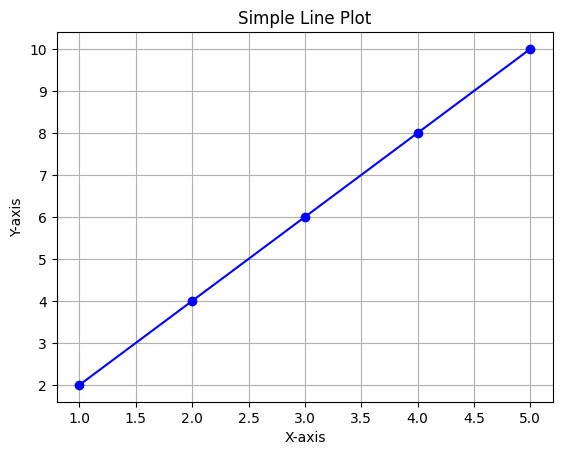

In [3]:
# Step 1: Import the Matplotlib library
import matplotlib.pyplot as plt

# Step 2: Create data
X = [1, 2, 3, 4, 5]
Y = [2, 4, 6, 8, 10]

# Step 3: Create a simple line plot
plt.plot(X, Y, marker='o', color='b')

# Add title and labels
plt.title("Simple Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Add grid lines
plt.grid(True)

# Display the plot
plt.show()


In [4]:
from collections import deque
import time
import sys

# Increase recursion limit for DFS
sys.setrecursionlimit(10000)

# Capacities of the two jugs
X, Y = 4, 3
goal = 2


# -----------------------------
# Helper function: possible next states
# -----------------------------
def get_next_states(x, y):
    return [
        (X, y),        # Fill Jug X
        (x, Y),        # Fill Jug Y
        (0, y),        # Empty Jug X
        (x, 0),        # Empty Jug Y
        (x - min(x, Y - y), y + min(x, Y - y)),  # Pour X -> Y
        (x + min(y, X - x), y - min(y, X - x))   # Pour Y -> X
    ]


# -----------------------------
# BFS Implementation
# -----------------------------
def bfs():
    visited = set()
    queue = deque([((0, 0), [])])  # (state, path)

    start_time = time.time()
    while queue:
        (x, y), path = queue.popleft()

        if (x, y) in visited:
            continue
        visited.add((x, y))

        # Goal check
        if x == goal or y == goal:
            end_time = time.time()
            return path + [(x, y)], len(visited), end_time - start_time

        for next_state in get_next_states(x, y):
            if next_state not in visited:
                queue.append((next_state, path + [(x, y)]))

    return None, len(visited), time.time() - start_time


# -----------------------------
# DFS Implementation
# -----------------------------
def dfs():
    visited = set()
    solution_path = []
    found = False
    start_time = time.time()

    def dfs_recursive(x, y, path):
        nonlocal found
        if found or (x, y) in visited:
            return
        visited.add((x, y))
        path.append((x, y))

        # Goal check
        if x == goal or y == goal:
            solution_path.extend(path)
            found = True
            return

        for next_state in get_next_states(x, y):
            if next_state not in visited:
                dfs_recursive(*next_state, path[:])  # copy path

    dfs_recursive(0, 0, [])
    end_time = time.time()
    return solution_path, len(visited), end_time - start_time


# -----------------------------
# Run both and compare
# -----------------------------
bfs_path, bfs_steps, bfs_time = bfs()
dfs_path, dfs_steps, dfs_time = dfs()

print("=== WATER JUG PROBLEM COMPARISON ===")
print("\nBFS Solution Path:", bfs_path)
print(f"BFS Steps: {bfs_steps}, Time: {bfs_time:.6f} sec")

print("\nDFS Solution Path:", dfs_path)
print(f"DFS Steps: {dfs_steps}, Time: {dfs_time:.6f} sec")

print("\nEstimated Memory Usage (roughly proportional to states explored):")
print(f"BFS: {bfs_steps} states, DFS: {dfs_steps} states")


=== WATER JUG PROBLEM COMPARISON ===

BFS Solution Path: [(0, 0), (0, 3), (3, 0), (3, 3), (4, 2)]
BFS Steps: 10, Time: 0.000054 sec

DFS Solution Path: [(0, 0), (4, 0), (4, 3), (0, 3), (3, 0), (3, 3), (4, 2)]
DFS Steps: 7, Time: 0.000037 sec

Estimated Memory Usage (roughly proportional to states explored):
BFS: 10 states, DFS: 7 states


In [5]:
import heapq

# Maze grid representation
# 0 = open path, 1 = wall
maze = [
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [1, 1, 1, 0, 0, 0],
]

start = (0, 0)  # A
goal = (5, 5)   # Y

# Manhattan Distance heuristic
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# A* Search
def astar(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    open_list = []
    heapq.heappush(open_list, (0 + heuristic(start, goal), 0, start, [start]))
    visited = set()

    while open_list:
        f, g, current, path = heapq.heappop(open_list)

        if current == goal:
            return path

        if current in visited:
            continue
        visited.add(current)

        x, y = current
        neighbors = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]

        for nx, ny in neighbors:
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 0:
                new_g = g + 1
                new_f = new_g + heuristic((nx, ny), goal)
                heapq.heappush(open_list, (new_f, new_g, (nx, ny), path + [(nx, ny)]))

    return None

# Run A*
path = astar(maze, start, goal)
print("A* Path from A to Y:")
print(path)


A* Path from A to Y:
[(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (5, 5)]
